# Final Project: Data processing

## Initial Data Intake

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

import os

# Read in data
DATA_PATH = "/content/drive/MyDrive/DATASCI 207/Final Project/NBA data - raw"
DATA_PATH_PROC = "/content/drive/MyDrive/DATASCI 207/Final Project/NBA data - processed"

In [3]:
# Function to loop through directories to read in files
def load_data(path_to_data):
    '''Load datasets
    Parameters:
    path_to_data (str): This is the path to data

    Returns:
    nba_data: A pandas dataframe
    '''
    # List all folders in data directory
    dir_list = os.listdir(path_to_data)

    # Initialize data
    nba_dfs = []
    vegas_dfs = []

    # Loop through NBA files
    for dir in dir_list:
      df = pd.read_csv(os.path.join(path_to_data, dir, "raw_scores.txt"),
                       delimiter=',', skiprows=[0], header=None)
      df['season'] = dir
      nba_dfs.append(df)

    # Loop through Vegas files
    for dir in dir_list:
      df = pd.read_csv(os.path.join(path_to_data, dir, "vegas.txt"),
                       delimiter=',')
      vegas_dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    nba_df = pd.concat(nba_dfs, ignore_index=True)
    vegas_df = pd.concat(vegas_dfs, ignore_index=True)

    # Name columns
    nba_df.columns = ["game_date", "game_sequence","game_id","team_id","team_abbr",
                      "team_city","game_result","pts_q1","pts_q2","pts_q3",
                      "pts_q4","pts_ot1","pts_ot2","pts_ot3","pts_ot4","pts_ot5",
                      "pts_ot6","pts_ot7","pts_ot8","pts_ot9","pts_ot10","pts_tot",
                      "fg_pct","ft_pct","fg3_pct","ast","reb","tov","season"]

    return nba_df, vegas_df

In [4]:
# Load data
nba_df, vegas_df = load_data(DATA_PATH)

## Pre-processing

### Joining datasets

In [5]:
# Show NBA columns
nba_df.columns

Index(['game_date', 'game_sequence', 'game_id', 'team_id', 'team_abbr',
       'team_city', 'game_result', 'pts_q1', 'pts_q2', 'pts_q3', 'pts_q4',
       'pts_ot1', 'pts_ot2', 'pts_ot3', 'pts_ot4', 'pts_ot5', 'pts_ot6',
       'pts_ot7', 'pts_ot8', 'pts_ot9', 'pts_ot10', 'pts_tot', 'fg_pct',
       'ft_pct', 'fg3_pct', 'ast', 'reb', 'tov', 'season'],
      dtype='object')

In [6]:
# Show Vegas columns
vegas_df.columns

Index(['Date', 'Location', 'Team', 'OppTeam', 'TeamId', 'GameId',
       'PercentBet_ML', 'Open_Line_ML', 'Pinnacle_ML', '5dimes_ML',
       'Heritage_ML', 'Bovada_ML', 'Betonline_ML', 'Average_Line_ML',
       'Best_Line_ML', 'Worst_Line_ML', 'PercentBet_Spread',
       'Open_Line_Spread', 'Open_Odds_Spread', 'Pinnacle_Line_Spread',
       'Pinnacle_Odds_Spread', '5dimes_Line_Spread', '5dimes_Odds_Spread',
       'Heritage_Line_Spread', 'Heritage_Odds_Spread', 'Bovada_Line_Spread',
       'Bovada_Odds_Spread', 'Betonline_Line_Spread', 'Betonline_Odds_Spread',
       'Average_Line_Spread', 'Average_Odds_Spread', 'Best_Line_Spread',
       'Worst_Line_Spread', 'Best_Odds_Spread', 'Worst_Odds_Spread',
       'PercentBet_OU', 'Open_Line_OU', 'Open_Odds_OU', 'Pinnacle_Line_OU',
       'Pinnacle_Odds_OU', '5dimes_Line_OU', '5dimes_Odds_OU',
       'Heritage_Line_OU', 'Heritage_Odds_OU', 'Bovada_Line_OU',
       'Bovada_Odds_OU', 'Betonline_Line_OU', 'Betonline_Odds_OU',
       'Average_Line

In [7]:
# Some NBA OT columns have no info
nba_df[['pts_ot5', 'pts_ot6', 'pts_ot7', 'pts_ot8', 'pts_ot9', 'pts_ot10']].describe()

# Drop NBA OT columns
nba_df = nba_df.drop(['pts_ot5', 'pts_ot6', 'pts_ot7', 'pts_ot8', 'pts_ot9', 'pts_ot10'], axis=1)

In [8]:
# Select desired Vegas columns
vegas_df = vegas_df[['Location', 'TeamId', 'GameId', 'Average_Line_Spread', 'Spread', 'Result', 'Average_Odds_Spread']]
vegas_df.columns = ['location', 'team_id', 'game_id', 'vegas_spread', 'spread', 'result', 'spread_odds']

# Merge data
combined_df = pd.merge(nba_df, vegas_df, on=['team_id', 'game_id'], how='left')

# Set ID types
combined_df['game_id'] = combined_df['game_id'].astype(str)
combined_df['team_id'] = combined_df['team_id'].astype(str)

In [9]:
# Dimensions
print("Combined shape:", combined_df.shape)
print("NBA data shape:", nba_df.shape)
print("Vegas data shape:", vegas_df.shape)

Combined shape: (17226, 28)
NBA data shape: (17226, 23)
Vegas data shape: (17208, 7)


### Cleaning anomalies

In [10]:
# Check NAs
print(combined_df.isna().sum())

game_date         0
game_sequence     0
game_id           0
team_id           0
team_abbr         0
team_city         0
game_result       0
pts_q1            0
pts_q2            0
pts_q3            0
pts_q4            0
pts_ot1           0
pts_ot2           0
pts_ot3           0
pts_ot4           0
pts_tot           0
fg_pct            0
ft_pct            0
fg3_pct           0
ast               0
reb               0
tov               0
season            0
location         18
vegas_spread     22
spread           18
result           18
spread_odds      22
dtype: int64


In [11]:
# Inspect games without Vegas spread
combined_df[combined_df['vegas_spread'].isna()]

,game_date,game_sequence,game_id,team_id,team_abbr,team_city,game_result,pts_q1,pts_q2,pts_q3,pts_q4,pts_ot1,pts_ot2,pts_ot3,pts_ot4,pts_tot,fg_pct,ft_pct,fg3_pct,ast,reb,tov,season,location,vegas_spread,spread,result,spread_odds
1698,2017-02-19,1,31600001,1610616833,EST,East NBA All Stars,0-1,53,39,47,43,0,0,0,0,182,0.569,1.000,0.373,43,50,19,2016-17,NaN,NaN,NaN,NaN,NaN
1699,2017-02-19,1,31600001,1610616834,WST,West NBA All Stars,1-0,48,49,47,48,0,0,0,0,192,0.587,0.750,0.333,60,61,17,2016-17,NaN,NaN,NaN,NaN,NaN
4888,2013-04-16,2,21201214,1610612754,IND,Indiana,49-32,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0,0,0,2012-13,NaN,NaN,NaN,NaN,NaN
4889,2013-04-16,2,21201214,1610612738,BOS,Boston,41-40,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0,0,0,2012-13,NaN,NaN,NaN,NaN,NaN
4974,2014-11-01,1,21400027,1610612742,DAL,Dallas,2-1,32,34,20,23,0,0,0,0,109,0.517,0.579,0.240,25,44,12,2014-15,away,NaN,5.0,W,NaN
4975,2014-11-01,1,21400027,1610612740,NOP,New Orleans,1-1,26,26,37,15,0,0,0,0,104,0.427,0.750,0.368,24,47,13,2014-15,home,NaN,-5.0,L,NaN
6748,2015-03-06,5,21400920,1610612748,MIA,Miami,27-34,18,21,34,24,0,0,0,0,97,0.468,0.684,0.370,18,37,14,2014-15,NaN,NaN,NaN,NaN,NaN
6749,2015-03-06,5,21400920,1610612764,WAS,Washington,35-27,40,27,21,11,0,0,0,0,99,0.463,0.889,0.304,24,43,15,2014-15,NaN,NaN,NaN,NaN,NaN
7540,2015-11-06,6,21500080,1610612748,MIA,Miami,3-3,26,23,19,19,0,0,0,0,87,0.444,0.692,0.300,21,40,11,2015-16,away,NaN,-3.0,L,NaN
7541,2015-11-06,6,21500080,1610612754,IND,Indiana,3-3,16,33,22,19,0,0,0,0,90,0.450,0.542,0.333,21,43,12,2015-16,home,NaN,3.0,W,NaN


In [12]:
# Games without Vegas spread are limited (6 All-Star games + 16 add'l). Drop games.
combined_df = combined_df.dropna()

### Main processing

In [13]:
# Drop unnecessary columns
combined_df = combined_df.drop(['game_sequence', 'game_result', 'team_city'], axis=1)

# Flip sign of actual spread to correspond with negative spreads indicating a favorite
combined_df['spread'] = combined_df['spread'] * -1

# Sort data
combined_df = combined_df.sort_values(by=['team_id', 'game_date']).reset_index(drop = True)

# Days since last game
combined_df['game_date'] = pd.to_datetime(combined_df['game_date'])
combined_df['days_since_last_game'] = combined_df.groupby('team_id')['game_date'].diff().dt.days

# Number of away games in a row
combined_df['consecutive_away_games'] = 0
for i in range(len(combined_df)):
    if combined_df.iloc[i]['location'] == 'away':
        if i == 0 or combined_df.iloc[i-1]['team_id'] != combined_df.iloc[i]['team_id']:
            combined_df.at[i, 'consecutive_away_games'] = 1
        else:
            combined_df.at[i, 'consecutive_away_games'] = combined_df.iloc[i-1]['consecutive_away_games'] + 1
    else:
        combined_df.at[i, 'consecutive_away_games'] = 0

# Remap NOH to NOP
combined_df['team_abbr'] = combined_df['team_abbr'].replace('NOH', 'NOP')

# For first game of the season, reset days since last game and number of away games
combined_df.loc[combined_df.groupby(['season', 'team_id'])['game_date'].idxmin(), 'days_since_last_game'] = 0
combined_df.loc[combined_df.groupby(['season', 'team_id'])['game_date'].idxmin(), 'consecutive_away_games'] = 0

# Examine data
combined_df.head()

,game_date,game_id,team_id,team_abbr,pts_q1,pts_q2,pts_q3,pts_q4,pts_ot1,pts_ot2,pts_ot3,pts_ot4,pts_tot,fg_pct,ft_pct,fg3_pct,ast,reb,tov,season,location,vegas_spread,spread,result,spread_odds,days_since_last_game,consecutive_away_games
0,2012-11-02,21200018,1610612737,ATL,21,23,30,28,0,0,0,0,102,0.471,0.882,0.318,23,36,13,2012-13,home,-4.92,7.0,L,-108.83,0.0,0
1,2012-11-04,21200040,1610612737,ATL,30,17,28,29,0,0,0,0,104,0.494,0.700,0.320,20,38,10,2012-13,away,9.17,-9.0,W,-108.00,2.0,1
2,2012-11-07,21200055,1610612737,ATL,22,29,14,24,0,0,0,0,89,0.437,0.500,0.318,24,51,17,2012-13,home,-3.83,-3.0,W,-109.83,3.0,0
3,2012-11-09,21200072,1610612737,ATL,25,21,25,18,0,0,0,0,89,0.420,0.750,0.360,20,36,13,2012-13,home,4.67,6.0,L,-109.67,2.0,0
4,2012-11-11,21200091,1610612737,ATL,19,18,23,16,0,0,0,0,76,0.417,0.438,0.360,20,41,22,2012-13,away,6.42,13.0,L,-109.17,2.0,1


In [14]:
# Check variable types
print(combined_df.dtypes)

game_date                 datetime64[ns]
game_id                           object
team_id                           object
team_abbr                         object
pts_q1                             int64
pts_q2                             int64
pts_q3                             int64
pts_q4                             int64
pts_ot1                            int64
pts_ot2                            int64
pts_ot3                            int64
pts_ot4                            int64
pts_tot                            int64
fg_pct                           float64
ft_pct                           float64
fg3_pct                          float64
ast                                int64
reb                                int64
tov                                int64
season                            object
location                          object
vegas_spread                     float64
spread                           float64
result                            object
spread_odds     

In [15]:
# Encode result column
combined_df['result'] = combined_df['result'].apply(lambda x: 1 if x == 'W' else 0)

## Performance variables for last n games

In [16]:
# Function for mean of statistics in last n games
def mean_last_n(series, n):
  series_shift = series.shift(1)
  result = series_shift.rolling(window=n, min_periods=0).mean()
  return result

# Function for winrate in last n games
def wr_last_n(series, n):
  series_shift = series.shift(1)
  wins = series_shift.rolling(window=n, min_periods=0).sum()
  games = series_shift.rolling(window=n, min_periods=0).count()
  wr = wins / games
  return wr

# Function to calculate team performance in last n games
def gen_last_n(df, n):
  vars = ['pts_tot', 'fg_pct', 'ft_pct', 'fg3_pct', 'ast', 'reb', 'tov', 'spread']
  df = df.sort_values(by=['team_id', 'game_date'])
  # Overall
  for var in vars:
    df[var + '_last' + str(n)] = df.groupby('team_id')[var].apply(lambda x: mean_last_n(x, n)).reset_index(level=0, drop=True)
  df['wr_last' + str(n)] = df.groupby('team_id')['result'].apply(lambda x: wr_last_n(x, n)).reset_index(level=0, drop=True)
  # Home stats
  for var in vars:
    df[var + '_last' + str(n) + "_home"] = df[df['location'] == 'home'].groupby('team_id')[var].apply(lambda x: mean_last_n(x, n)).reset_index(level=0, drop=True)
  df['wr_last' + str(n) + "_home"] = df[df['location'] == 'home'].groupby('team_id')['result'].apply(lambda x: wr_last_n(x, n)).reset_index(level=0, drop=True)
  # Away stats
  for var in vars:
    df[var + '_last' + str(n) + "_away"] = df[df['location'] == 'away'].groupby('team_id')[var].apply(lambda x: mean_last_n(x, n)).reset_index(level=0, drop=True)
  df['wr_last' + str(n) + "_away"] = df[df['location'] == 'away'].groupby('team_id')['result'].apply(lambda x: wr_last_n(x, n)).reset_index(level=0, drop=True)
  # Consolidate locations
  for var in ['pts_tot', 'fg_pct', 'ft_pct', 'fg3_pct', 'ast', 'reb', 'tov', 'spread', 'wr']:
    # Use the original DataFrame index to access home and away stats
    df[var + '_last' + str(n) + '_loc'] = df.apply(lambda row: row[var + '_last' + str(n) + '_home'] if row['location'] == 'home' else row[var + '_last' + str(n) + '_away'], axis=1)
    df = df.drop([var + '_last' + str(n) + '_home', var + '_last' + str(n) + '_away'], axis=1)

  return df

In [17]:
# Calculate team performance in last 5/10/20 games
# combined_df = gen_last_n(combined_df, 5)
combined_df = gen_last_n(combined_df, 10)
combined_df = gen_last_n(combined_df, 20)
combined_df = gen_last_n(combined_df, 50)

# Sort and data
combined_df = combined_df.sort_values(by=['season', 'game_date', 'game_id', 'location']).reset_index(drop=True)

In [18]:
# Check proper performance variable processing of a data sample
combined_df[combined_df['team_abbr'] == "ATL"][['team_abbr', 'game_date', 'location', 'tov',
                                                'tov_last50', 'tov_last10', 'tov_last20',
                                                'tov_last50_loc', 'tov_last10_loc', 'tov_last20_loc',
                                                'days_since_last_game', 'consecutive_away_games']].head(20)

,team_abbr,game_date,location,tov,tov_last50,tov_last10,tov_last20,tov_last50_loc,tov_last10_loc,tov_last20_loc,days_since_last_game,consecutive_away_games
33,ATL,2012-11-02,home,13,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
76,ATL,2012-11-04,away,10,13.000000,13.000000,13.000000,NaN,NaN,NaN,2.0,1
107,ATL,2012-11-07,home,17,11.500000,11.500000,11.500000,13.000000,13.000000,13.000000,3.0,0
141,ATL,2012-11-09,home,13,13.333333,13.333333,13.333333,15.000000,15.000000,15.000000,2.0,0
178,ATL,2012-11-11,away,22,13.250000,13.250000,13.250000,10.000000,10.000000,10.000000,2.0,1
200,ATL,2012-11-12,away,16,15.000000,15.000000,15.000000,16.000000,16.000000,16.000000,1.0,2
232,ATL,2012-11-14,away,12,15.166667,15.166667,15.166667,16.000000,16.000000,16.000000,2.0,3
252,ATL,2012-11-16,away,15,14.714286,14.714286,14.714286,15.000000,15.000000,15.000000,2.0,4
295,ATL,2012-11-19,home,13,14.750000,14.750000,14.750000,14.333333,14.333333,14.333333,3.0,0
321,ATL,2012-11-21,home,13,14.555556,14.555556,14.555556,14.000000,14.000000,14.000000,2.0,0


In [19]:
# Drop early games without historical performance data - should be 30 * 2 games for each team
print("Before:", combined_df.shape)
combined_df = combined_df.dropna()
print("After:", combined_df.shape)

Before: (17204, 81)
After: (17144, 81)


## EDA

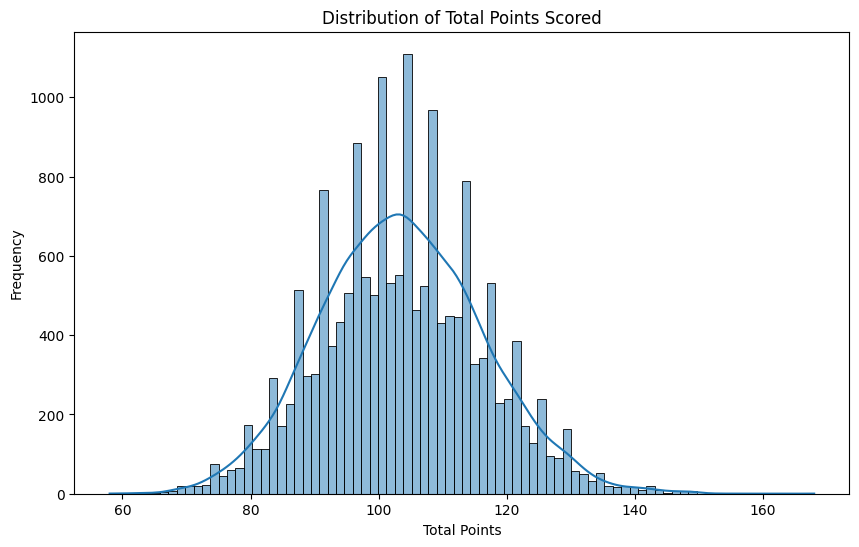

In [20]:
# Distribution of total points scored
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['pts_tot'], kde=True)
plt.title('Distribution of Total Points Scored')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.show()

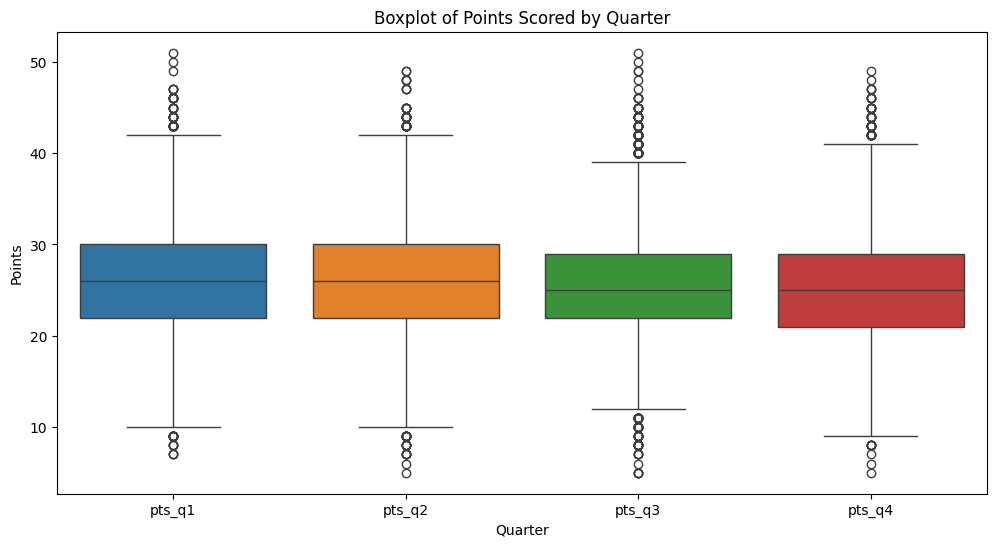

In [21]:
# Boxplot of points scored by each quarter
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df[['pts_q1', 'pts_q2', 'pts_q3', 'pts_q4']])
plt.title('Boxplot of Points Scored by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Points')
plt.show()

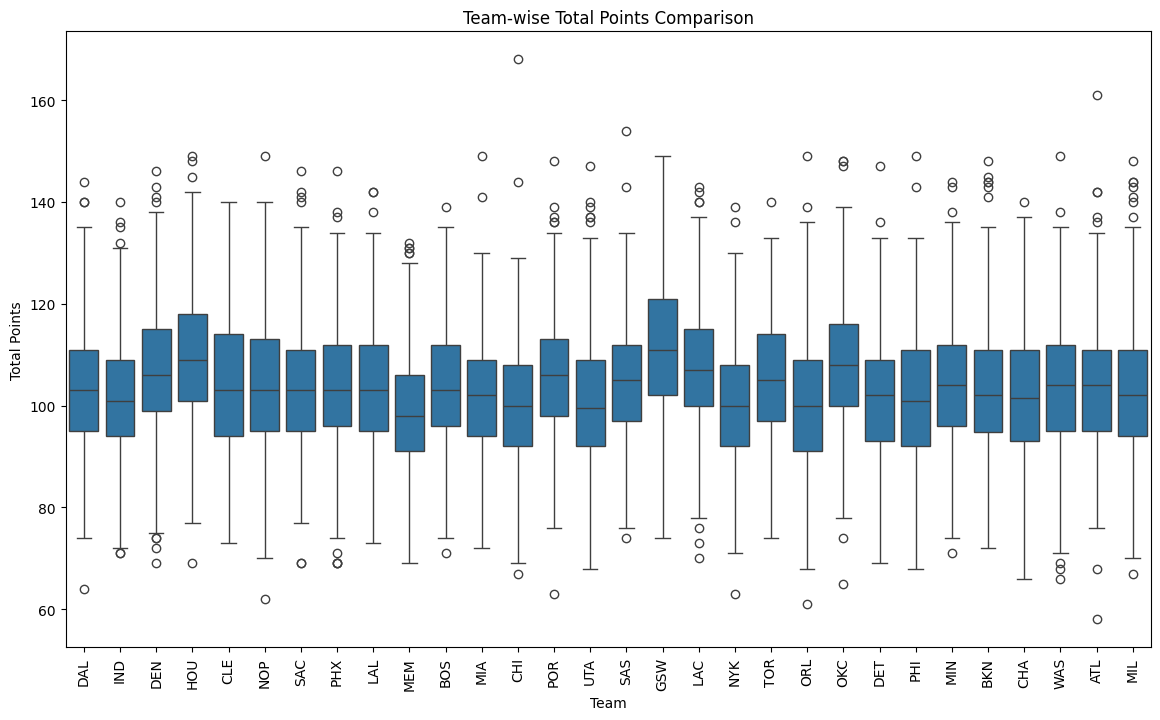

In [22]:
# Team-wise points comparison
plt.figure(figsize=(14, 8))
sns.boxplot(x='team_abbr', y='pts_tot', data=combined_df)
plt.title('Team-wise Total Points Comparison')
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.xticks(rotation=90)
plt.show()

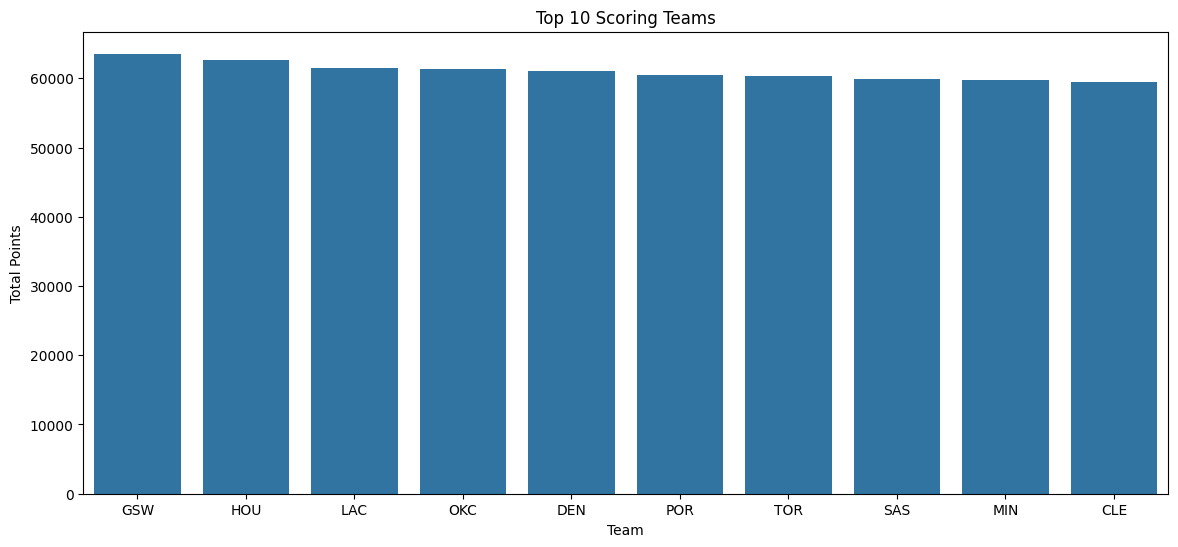

In [23]:
# Top scoring teams
top_teams = combined_df.groupby('team_abbr')['pts_tot'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 6))
sns.barplot(x=top_teams.index, y=top_teams.values)
plt.title('Top 10 Scoring Teams')
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.show()

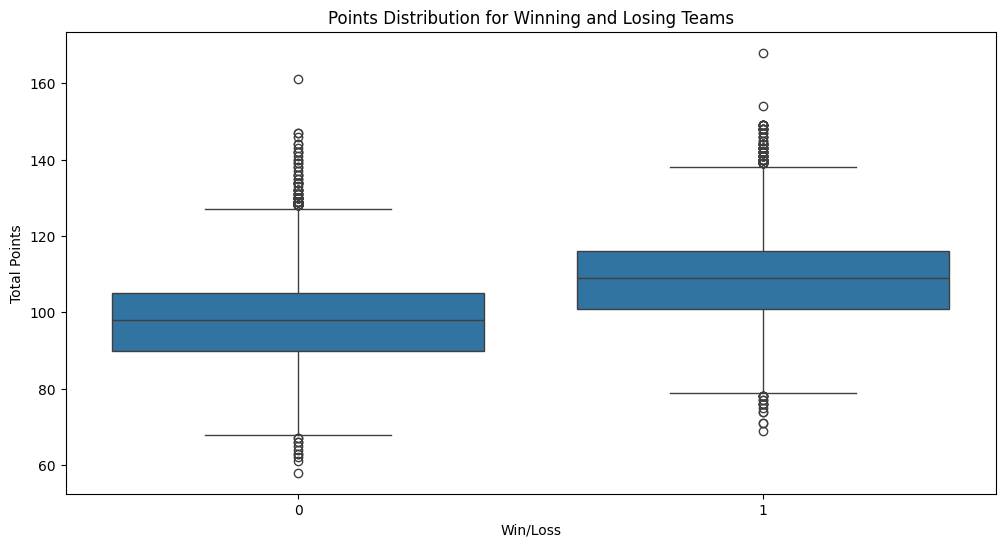

In [24]:
# Boxplot of points for winning and losing teams
plt.figure(figsize=(12, 6))
sns.boxplot(x='result', y='pts_tot', data=combined_df)
plt.title('Points Distribution for Winning and Losing Teams')
plt.xlabel('Win/Loss')
plt.ylabel('Total Points')
plt.show()

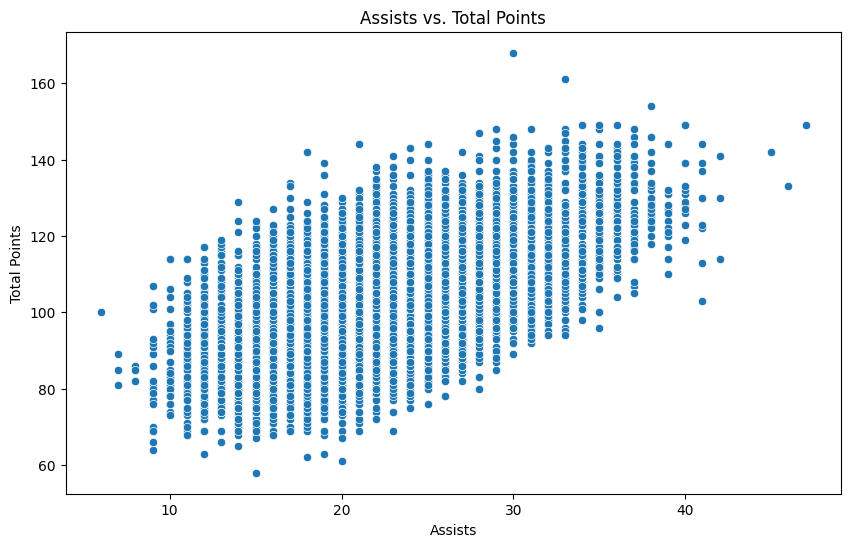

In [25]:
# Scatter plot of assists vs. points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ast', y='pts_tot', data=combined_df)
plt.title('Assists vs. Total Points')
plt.xlabel('Assists')
plt.ylabel('Total Points')
plt.show()

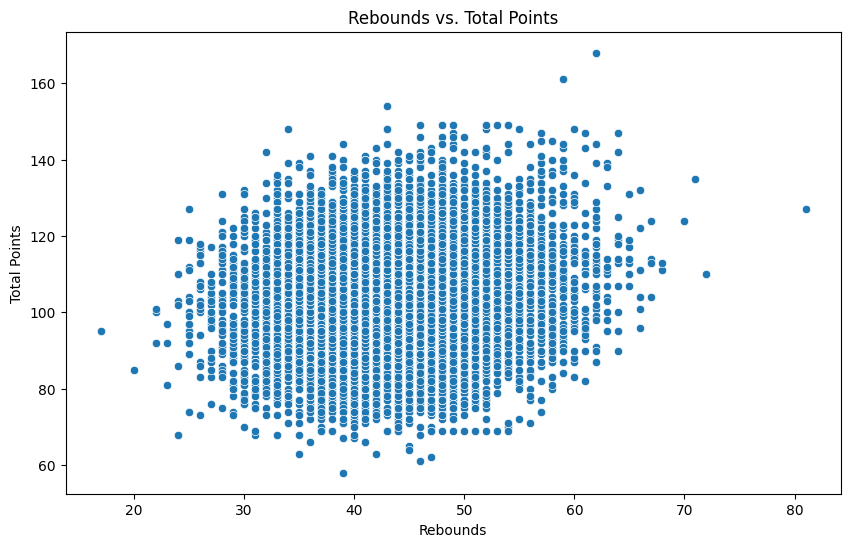

In [26]:
# Scatter plot of rebounds vs. points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reb', y='pts_tot', data=combined_df)
plt.title('Rebounds vs. Total Points')
plt.xlabel('Rebounds')
plt.ylabel('Total Points')
plt.show()

In [27]:
print(combined_df.columns)

Index(['game_date', 'game_id', 'team_id', 'team_abbr', 'pts_q1', 'pts_q2',
       'pts_q3', 'pts_q4', 'pts_ot1', 'pts_ot2', 'pts_ot3', 'pts_ot4',
       'pts_tot', 'fg_pct', 'ft_pct', 'fg3_pct', 'ast', 'reb', 'tov', 'season',
       'location', 'vegas_spread', 'spread', 'result', 'spread_odds',
       'days_since_last_game', 'consecutive_away_games', 'pts_tot_last10',
       'fg_pct_last10', 'ft_pct_last10', 'fg3_pct_last10', 'ast_last10',
       'reb_last10', 'tov_last10', 'spread_last10', 'wr_last10',
       'pts_tot_last10_loc', 'fg_pct_last10_loc', 'ft_pct_last10_loc',
       'fg3_pct_last10_loc', 'ast_last10_loc', 'reb_last10_loc',
       'tov_last10_loc', 'spread_last10_loc', 'wr_last10_loc',
       'pts_tot_last20', 'fg_pct_last20', 'ft_pct_last20', 'fg3_pct_last20',
       'ast_last20', 'reb_last20', 'tov_last20', 'spread_last20', 'wr_last20',
       'pts_tot_last20_loc', 'fg_pct_last20_loc', 'ft_pct_last20_loc',
       'fg3_pct_last20_loc', 'ast_last20_loc', 'reb_last20_loc',


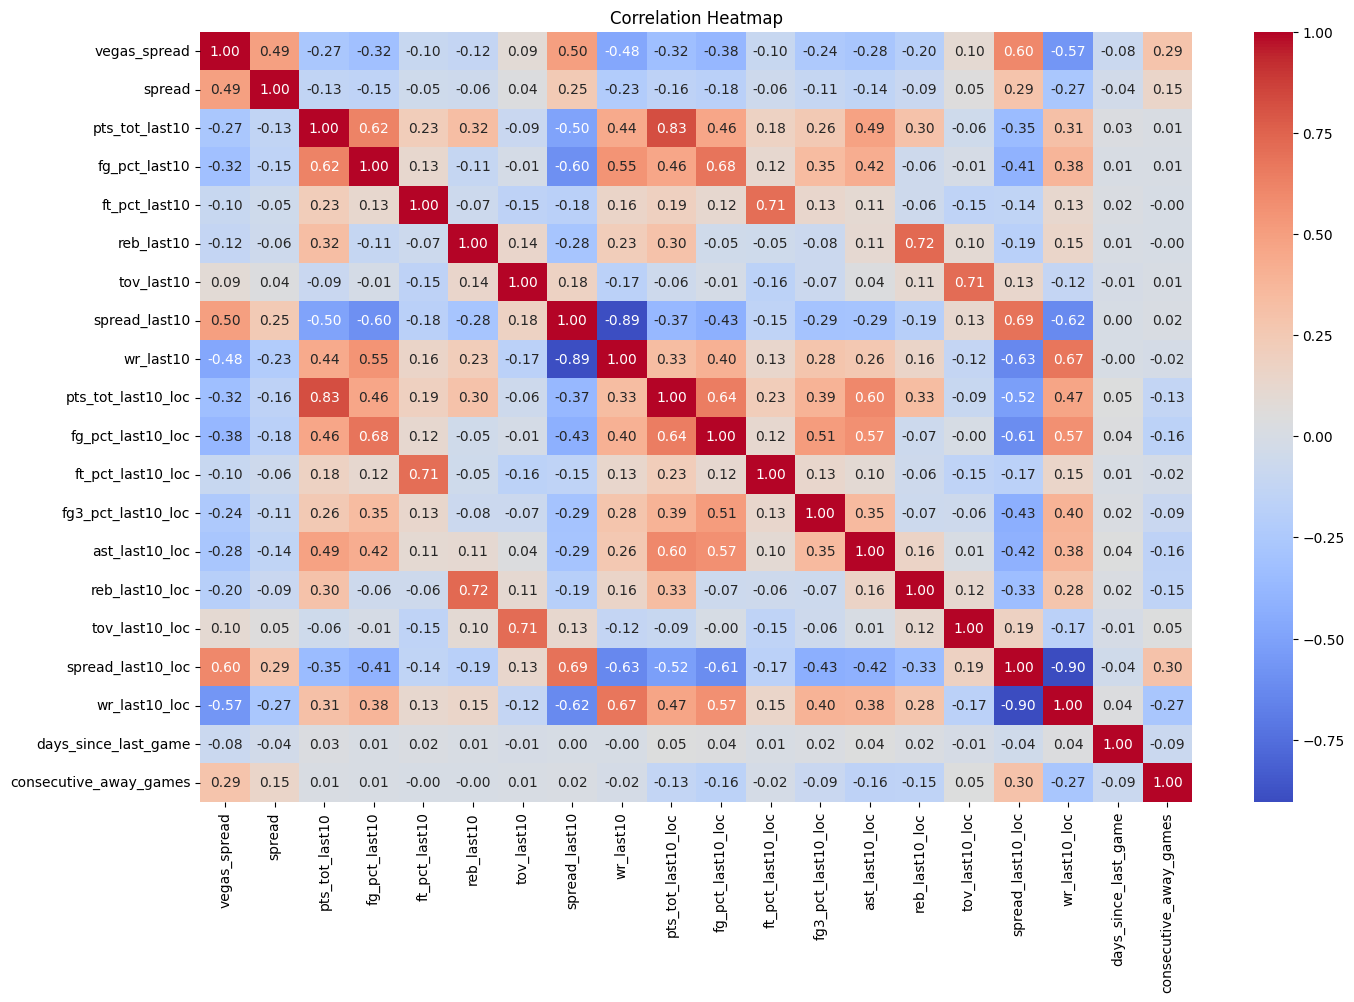

In [28]:
# Drop current-game variables not used for prediction
combined_df = combined_df.drop(['pts_q1', 'pts_q2','pts_q3', 'pts_q4', 'pts_ot1',
                                'pts_ot2', 'pts_ot3', 'pts_ot4', 'pts_tot', 'fg_pct',
                                'ft_pct', 'fg3_pct', 'ast', 'reb', 'tov', 'result'],
                                axis=1)
consolidated_df = combined_df.filter(['vegas_spread', 'spread', 'pts_tot_last10', 'fg_pct_last10',
                                      'ft_pct_last10', 'fg3_pct_last10' 'ast_last10', 'reb_last10',
                                      'tov_last10', 'spread_last10', 'wr_last10', 'pts_tot_last10_loc',
                                      'fg_pct_last10_loc', 'ft_pct_last10_loc', 'fg3_pct_last10_loc',
                                      'ast_last10_loc', 'reb_last10_loc', 'tov_last10_loc',
                                      'spread_last10_loc', 'wr_last10_loc', 'days_since_last_game',
                                      'consecutive_away_games'])

# Correlation heatmap
plt.figure(figsize=(16, 10))
numeric_cols = consolidated_df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(consolidated_df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Additional pre-processing

### Reshape and generate classifier

In [29]:
# Reshape wide on game level
cols_to_pivot = ['team_abbr', 'vegas_spread', 'spread', 'days_since_last_game', 'consecutive_away_games',
                 'pts_tot_last50', 'fg_pct_last50', 'ft_pct_last50', 'fg3_pct_last50', 'ast_last50',
                 'reb_last50', 'tov_last50', 'spread_last50', 'wr_last50', 'pts_tot_last10',
                 'fg_pct_last10', 'ft_pct_last10', 'fg3_pct_last10', 'ast_last10',
                 'reb_last10', 'tov_last10', 'spread_last10', 'wr_last10', 'pts_tot_last20',
                 'fg_pct_last20', 'ft_pct_last20', 'fg3_pct_last20', 'ast_last20',
                 'reb_last20', 'tov_last20', 'spread_last20', 'wr_last20', 'pts_tot_last10_loc',
                 'fg_pct_last10_loc', 'ft_pct_last10_loc', 'fg3_pct_last10_loc',
                 'ast_last10_loc', 'reb_last10_loc', 'tov_last10_loc',
                 'spread_last10_loc', 'wr_last10_loc', 'pts_tot_last20_loc',
                 'fg_pct_last20_loc', 'ft_pct_last20_loc', 'fg3_pct_last20_loc',
                 'ast_last20_loc', 'reb_last20_loc', 'tov_last20_loc',
                 'spread_last20_loc', 'wr_last20_loc', 'pts_tot_last50_loc',
                 'fg_pct_last50_loc', 'ft_pct_last50_loc', 'fg3_pct_last50_loc',
                 'ast_last50_loc', 'reb_last50_loc', 'tov_last50_loc',
                 'spread_last50_loc', 'wr_last50_loc', 'spread_odds']
game_df = combined_df.pivot(index=['game_id', 'game_date', 'season'], columns='location', values=cols_to_pivot)

# Flatten columns
game_df.columns = ['_'.join(col).strip() for col in game_df.columns.values]

# Drop away spreads and home consecutive away count
game_df = game_df.drop(['vegas_spread_away', 'spread_away', 'consecutive_away_games_home', 'spread_odds_away'], axis=1)

# Rename columns
game_df = game_df.rename(columns={'game_id_': 'game_id',
                                  'game_date_': 'game_date',
                                  'season_': 'season',
                                  'vegas_spread_home': 'vegas_spread',
                                  'spread_home': 'spread',
                                  'consecutive_away_games_away': 'consecutive_away_games',
                                  'spread_odds_home': 'spread_odds'})

# Reset index
game_df = game_df.reset_index()

# Inspect data
game_df.head()

# Some games only have information for one team - drop these games
game_df = game_df.dropna()

# Reset index
game_df = game_df.reset_index(drop = True)

# Classify actual spread against Vegas spread
game_df['spread_sign'] = ['negative' if x < 0 else 'positive' for x in game_df['vegas_spread']]
game_df['covered_spread'] = [0 if x == 'negative' and y > z or x == 'positive' and y < z else 1 for x, y, z in zip(game_df['spread_sign'], game_df['spread'], game_df['vegas_spread'])]
game_df = game_df.drop(['spread_sign'], axis=1)

# Convert odds to payout ratio
game_df['spread_odds'] = game_df.apply(lambda row: -100/row['spread_odds'] if row['spread_odds'] < 0 else row['spread_odds']/100, axis=1)

# Inspect data
game_df.head()

,game_id,game_date,season,team_abbr_away,team_abbr_home,vegas_spread,spread,days_since_last_game_away,days_since_last_game_home,consecutive_away_games,pts_tot_last50_away,pts_tot_last50_home,fg_pct_last50_away,fg_pct_last50_home,ft_pct_last50_away,ft_pct_last50_home,fg3_pct_last50_away,fg3_pct_last50_home,ast_last50_away,ast_last50_home,reb_last50_away,reb_last50_home,tov_last50_away,tov_last50_home,spread_last50_away,spread_last50_home,wr_last50_away,wr_last50_home,pts_tot_last10_away,pts_tot_last10_home,fg_pct_last10_away,fg_pct_last10_home,ft_pct_last10_away,ft_pct_last10_home,fg3_pct_last10_away,fg3_pct_last10_home,ast_last10_away,ast_last10_home,reb_last10_away,reb_last10_home,tov_last10_away,tov_last10_home,spread_last10_away,spread_last10_home,wr_last10_away,wr_last10_home,pts_tot_last20_away,pts_tot_last20_home,fg_pct_last20_away,fg_pct_last20_home,ft_pct_last20_away,ft_pct_last20_home,fg3_pct_last20_away,fg3_pct_last20_home,ast_last20_away,ast_last20_home,reb_last20_away,reb_last20_home,tov_last20_away,tov_last20_home,spread_last20_away,spread_last20_home,wr_last20_away,wr_last20_home,pts_tot_last10_loc_away,pts_tot_last10_loc_home,fg_pct_last10_loc_away,fg_pct_last10_loc_home,ft_pct_last10_loc_away,ft_pct_last10_loc_home,fg3_pct_last10_loc_away,fg3_pct_last10_loc_home,ast_last10_loc_away,ast_last10_loc_home,reb_last10_loc_away,reb_last10_loc_home,tov_last10_loc_away,tov_last10_loc_home,spread_last10_loc_away,spread_last10_loc_home,wr_last10_loc_away,wr_last10_loc_home,pts_tot_last20_loc_away,pts_tot_last20_loc_home,fg_pct_last20_loc_away,fg_pct_last20_loc_home,ft_pct_last20_loc_away,ft_pct_last20_loc_home,fg3_pct_last20_loc_away,fg3_pct_last20_loc_home,ast_last20_loc_away,ast_last20_loc_home,reb_last20_loc_away,reb_last20_loc_home,tov_last20_loc_away,tov_last20_loc_home,spread_last20_loc_away,spread_last20_loc_home,wr_last20_loc_away,wr_last20_loc_home,pts_tot_last50_loc_away,pts_tot_last50_loc_home,fg_pct_last50_loc_away,fg_pct_last50_loc_home,ft_pct_last50_loc_away,ft_pct_last50_loc_home,fg3_pct_last50_loc_away,fg3_pct_last50_loc_home,ast_last50_loc_away,ast_last50_loc_home,reb_last50_loc_away,reb_last50_loc_home,tov_last50_loc_away,tov_last50_loc_home,spread_last50_loc_away,spread_last50_loc_home,wr_last50_loc_away,wr_last50_loc_home,spread_odds,covered_spread
0,21200013,2012-11-26,2012-13,NYK,BKN,1.17,-7.0,1.0,1.0,1,103.416667,95.583333,0.458417,0.449583,0.783917,0.723083,0.405833,0.326667,20.416667,21.666667,39.5,41.333333,10.75,13.083333,-8.0,-4.083333,0.75,0.666667,103.7,94.4,0.4566,0.4459,0.7929,0.7225,0.3935,0.2955,20.0,21.6,39.4,42.6,10.3,12.7,-6.0,-5.3,0.7,0.7,103.416667,95.583333,0.458417,0.449583,0.783917,0.723083,0.405833,0.326667,20.416667,21.666667,39.5,41.333333,10.75,13.083333,-8.0,-4.083333,0.75,0.666667,103.428571,97.857143,0.471571,0.452429,0.793286,0.731714,0.396571,0.361,20.0,22.142857,38.0,42.0,10.714286,13.714286,-2.428571,-6.428571,0.571429,0.857143,103.428571,97.857143,0.471571,0.452429,0.793286,0.731714,0.396571,0.361,20.0,22.142857,38.0,42.0,10.714286,13.714286,-2.428571,-6.428571,0.571429,0.857143,103.428571,97.857143,0.471571,0.452429,0.793286,0.731714,0.396571,0.361,20.0,22.142857,38.0,42.0,10.714286,13.714286,-2.428571,-6.428571,0.571429,0.857143,0.923105,0
1,21200030,2012-11-03,2012-13,DEN,MIA,-8.42,-3.0,1.0,1.0,3,82.0,102.0,0.378,0.5045,0.561,0.8295,0.2455,0.425,20.5,21.5,49.5,38.5,17.0,14.5,11.0,3.5,0.0,0.5,82.0,102.0,0.378,0.5045,0.561,0.8295,0.2455,0.425,20.5,21.5,49.5,38.5,17.0,14.5,11.0,3.5,0.0,0.5,82.0,102.0,0.378,0.5045,0.561,0.8295,0.2455,0.425,20.5,21.5,49.5,38.5,17.0,14.5,11.0,3.5,0.0,0.5,82.0,120.0,0.378,0.544,0.561,0.813,0.2455,0.5,20.5,25.0,49.5,36.0,17.0,8.0,11.0,-13.0,0.0,1.0,82.0,120.0,0.378,0.544,0.561,0.813,0.2455,0.5,20.5,25.0,49.5,36.0,17.0,8.0,11.0,-13.0,0.0,1.0,82.0,120.0,0.378,0.544,0.561,0.813,0.2455,0.5,20.5,25.0,49.5,36.0,17.0,8.0,11.0,-13.0,0.0,1.0,0.920217,0
2,21200035,2012-11-03,2012-13,UTA,SAS,-7.5,-10.0,1.0,2.0,2,99.5,92.5,0.4195,0.459,0.619,0.671,0.39

In [30]:
# Inspect result class balance
game_df['covered_spread'].value_counts()

covered_spread
0    4289
1    4271
Name: count, dtype: int64

In [31]:
# Describe data
game_df = game_df.infer_objects()
game_df['game_id'] = game_df['game_id'].astype(str)
game_df.describe()

,game_date,vegas_spread,spread,days_since_last_game_away,days_since_last_game_home,consecutive_away_games,pts_tot_last50_away,pts_tot_last50_home,fg_pct_last50_away,fg_pct_last50_home,ft_pct_last50_away,ft_pct_last50_home,fg3_pct_last50_away,fg3_pct_last50_home,ast_last50_away,ast_last50_home,reb_last50_away,reb_last50_home,tov_last50_away,tov_last50_home,spread_last50_away,spread_last50_home,wr_last50_away,wr_last50_home,pts_tot_last10_away,pts_tot_last10_home,fg_pct_last10_away,fg_pct_last10_home,ft_pct_last10_away,ft_pct_last10_home,fg3_pct_last10_away,fg3_pct_last10_home,ast_last10_away,ast_last10_home,reb_last10_away,reb_last10_home,tov_last10_away,tov_last10_home,spread_last10_away,spread_last10_home,wr_last10_away,wr_last10_home,pts_tot_last20_away,pts_tot_last20_home,fg_pct_last20_away,fg_pct_last20_home,ft_pct_last20_away,ft_pct_last20_home,fg3_pct_last20_away,fg3_pct_last20_home,ast_last20_away,ast_last20_home,reb_last20_away,reb_last20_home,tov_last20_away,tov_last20_home,spread_last20_away,spread_last20_home,wr_last20_away,wr_last20_home,pts_tot_last10_loc_away,pts_tot_last10_loc_home,fg_pct_last10_loc_away,fg_pct_last10_loc_home,ft_pct_last10_loc_away,ft_pct_last10_loc_home,fg3_pct_last10_loc_away,fg3_pct_last10_loc_home,ast_last10_loc_away,ast_last10_loc_home,reb_last10_loc_away,reb_last10_loc_home,tov_last10_loc_away,tov_last10_loc_home,spread_last10_loc_away,spread_last10_loc_home,wr_last10_loc_away,wr_last10_loc_home,pts_tot_last20_loc_away,pts_tot_last20_loc_home,fg_pct_last20_loc_away,fg_pct_last20_loc_home,ft_pct_last20_loc_away,ft_pct_last20_loc_home,fg3_pct_last20_loc_away,fg3_pct_last20_loc_home,ast_last20_loc_away,ast_last20_loc_home,reb_last20_loc_away,reb_last20_loc_home,tov_last20_loc_away,tov_last20_loc_home,spread_last20_loc_away,spread_last20_loc_home,wr_last20_loc_away,wr_last20_loc_home,pts_tot_last50_loc_away,pts_tot_last50_loc_home,fg_pct_last50_loc_away,fg_pct_last50_loc_home,ft_pct_last50_loc_away,ft_pct_last50_loc_home,fg3_pct_last50_loc_away,fg3_pct_last50_loc_home,ast_last50_loc_away,ast_last50_loc_home,reb_last50_loc_away,reb_last50_loc_home,tov_last50_loc_away,tov_last50_loc_home,spread_last50_loc_away,spread_last50_loc_home,wr_last50_loc_away,wr_last50_loc_home,spread_odds,covered_spread
count,8560,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.00000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.00000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000
mean,2016-01-23 22:01:03.925233408,-2.814792,-2.689369,1.967991,2.188902,1.955958,102.931915,102.904316,0.455647,0.455498,0.760397,0.760645,0.355015,0.354655,22.559566,22.536025,43.320360,43.295487,13.789300,13.789639,-0.027803,0.029394,0.500937,0.499213,103.473402,103.403311,0.456263,0.455972,0.760960,0.761279,0.355166,0.354768,22.684298,2

### Scaling and dummies

In [32]:
# Scale data BY SEASON
# We avoid data leakage as the scaling is performed BY SEASON
numeric_cols = game_df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
  if col in ['covered_spread', 'spread_odds']:
    continue
  game_df[col] = game_df.groupby('season')[col].transform(lambda x: (x - x.mean()) / x.std())

# Select features
game_df = game_df.drop(['game_id', 'game_date', 'team_abbr_away'], axis = 1)

# One-hot encoding of location
game_df = pd.get_dummies(game_df, columns=['team_abbr_home'])

# Inspect data
game_df.head()

,season,vegas_spread,spread,days_since_last_game_away,days_since_last_game_home,consecutive_away_games,pts_tot_last50_away,pts_tot_last50_home,fg_pct_last50_away,fg_pct_last50_home,ft_pct_last50_away,ft_pct_last50_home,fg3_pct_last50_away,fg3_pct_last50_home,ast_last50_away,ast_last50_home,reb_last50_away,reb_last50_home,tov_last50_away,tov_last50_home,spread_last50_away,spread_last50_home,wr_last50_away,wr_last50_home,pts_tot_last10_away,pts_tot_last10_home,fg_pct_last10_away,fg_pct_last10_home,ft_pct_last10_away,ft_pct_last10_home,fg3_pct_last10_away,fg3_pct_last10_home,ast_last10_away,ast_last10_home,reb_last10_away,reb_last10_home,tov_last10_away,tov_last10_home,spread_last10_away,spread_last10_home,wr_last10_away,wr_last10_home,pts_tot_last20_away,pts_tot_last20_home,fg_pct_last20_away,fg_pct_last20_home,ft_pct_last20_away,ft_pct_last20_home,fg3_pct_last20_away,fg3_pct_last20_home,ast_last20_away,ast_last20_home,reb_last20_away,reb_last20_home,tov_last20_away,tov_last20_home,spread_last20_away,spread_last20_home,wr_last20_away,wr_last20_home,pts_tot_last10_loc_away,pts_tot_last10_loc_home,fg_pct_last10_loc_away,fg_pct_last10_loc_home,ft_pct_last10_loc_away,ft_pct_last10_loc_home,fg3_pct_last10_loc_away,fg3_pct_last10_loc_home,ast_last10_loc_away,ast_last10_loc_home,reb_last10_loc_away,reb_last10_loc_home,tov_last10_loc_away,tov_last10_loc_home,spread_last10_loc_away,spread_last10_loc_home,wr_last10_loc_away,wr_last10_loc_home,pts_tot_last20_loc_away,pts_tot_last20_loc_home,fg_pct_last20_loc_away,fg_pct_last20_loc_home,ft_pct_last20_loc_away,ft_pct_last20_loc_home,fg3_pct_last20_loc_away,fg3_pct_last20_loc_home,ast_last20_loc_away,ast_last20_loc_home,reb_last20_loc_away,reb_last20_loc_home,tov_last20_loc_away,tov_last20_loc_home,spread_last20_loc_away,spread_last20_loc_home,wr_last20_loc_away,wr_last20_loc_home,pts_tot_last50_loc_away,pts_tot_last50_loc_home,fg_pct_last50_loc_away,fg_pct_last50_loc_home,ft_pct_last50_loc_away,ft_pct_last50_loc_home,fg3_pct_last50_loc_away,fg3_pct_last50_loc_home,ast_last50_loc_away,ast_last50_loc_home,reb_last50_loc_away,reb_last50_loc_home,tov_last50_loc_away,tov_last50_loc_home,spread_last50_loc_away,spread_last50_loc_home,wr_last50_loc_away,wr_last50_loc_home,spread_odds,covered_spread,team_abbr_home_ATL,team_abbr_home_BKN,team_abbr_home_BOS,team_abbr_home_CHA,team_abbr_home_CHI,team_abbr_home_CLE,team_abbr_home_DAL,team_abbr_home_DEN,team_abbr_home_DET,team_abbr_home_GSW,team_abbr_home_HOU,team_abbr_home_IND,team_abbr_home_LAC,team_abbr_home_LAL,team_abbr_home_MEM,team_abbr_home_MIA,team_abbr_home_MIL,team_abbr_home_MIN,team_abbr_home_NOP,team_abbr_home_NYK,team_abbr_home_OKC,team_abbr_home_ORL,team_abbr_home_PHI,team_abbr_home_PHX,team_abbr_home_POR,team_abbr_home_SAC,team_abbr_home_SAS,team_abbr_home_TOR,team_abbr_home_UTA,team_abbr_home_WAS
0,2012-13,0.736625,-0.287521,-0.995989,-1.354395,-0.753210,1.303361,-0.465296,0.416065,-0.027660,0.814251,-0.863258,1.840124,-0.930853,-0.899764,-0.127253,-1.270369,-0.423925,-2.975356,-0.915161,-1.644282,-0.866558,1.433980,0.964676,1.029272,-0.658945,0.137808,-0.312314,0.862372,-0.699088,0.951702,-1.436764,-0.970572,-0.240887,-1.014203,0.204678,-2.625210,-0.895281,-0.958425,-0.879149,0.913543,0.933922,1.130620,-0.472773,0.285552,-0.139349,0.766828,-0.788809,1.524571,-0.819140,-0.871414,-0.214745,-1.121032,-0.347911,-2.728037,-0.782982,-1.453916,-0.765016,1.308409,0.878913,1.344928,-0.277615,1.068917,-0.223460,0.733381,-0.392287,1.327231,-0.106479,-0.583885,-0.255118,-1.447180,-0.225178,-2.155209,-0.047500,-0.934541,-0.480227,0.839058,1.058779,1.561722,-0.277342,1.263282,-0.179305,0.771247,-0.442648,1.615540,-0.113200,-0.589226,-0.238825,-1.764891,-0.227595,-2.391767,-0.040463,-1.041687,-0.525997,0.908021,1.157118,1.655750,-0.257426,1.362934,-0.117600,0.768568,-0.484899,1.713395,-0.107785,-0.564238,-0.187953,-1.900120,-0.221257,-2.506361,-0.039582,-1.069030,-0.554964,0.910546,1.208693,0.923105,0,False,True,False,False,False,False,False,False,Fals

In [33]:
# Data split
X_train = game_df[game_df['season'].isin(['2012-13', '2013-14', '2014-15', '2015-16', '2016-17'])]
X_val = game_df[game_df['season'] == '2017-18']
X_test = game_df[game_df['season'] == '2018-19']

# Separate labels
y_train = X_train[['spread', 'vegas_spread', 'covered_spread']]
y_val = X_val[['spread', 'vegas_spread', 'covered_spread']]
y_test = X_test[['spread', 'vegas_spread', 'covered_spread']]

# Separate odds
odds_train = X_train[['spread_odds']]
odds_val = X_val[['spread_odds']]
odds_test = X_test[['spread_odds']]

# Remove labels from features
X_train = X_train.drop(['spread', 'vegas_spread', 'covered_spread', 'spread_odds'], axis=1)
X_val = X_val.drop(['spread', 'vegas_spread', 'covered_spread', 'spread_odds'], axis=1)
X_test = X_test.drop(['spread', 'vegas_spread', 'covered_spread', 'spread_odds'], axis=1)

# Reset index
odds_train = odds_train.reset_index(drop=True)
odds_val = odds_val.reset_index(drop=True)
odds_test = odds_test.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Save data
odds_train.to_csv(os.path.join(DATA_PATH_PROC, 'odds_train.csv'), index=False)
odds_val.to_csv(os.path.join(DATA_PATH_PROC, 'odds_val.csv'), index=False)
odds_test.to_csv(os.path.join(DATA_PATH_PROC, 'odds_test.csv'), index=False)
X_train.to_csv(os.path.join(DATA_PATH_PROC, 'X_train.csv'), index=False)
X_val.to_csv(os.path.join(DATA_PATH_PROC, 'X_val.csv'), index=False)
X_test.to_csv(os.path.join(DATA_PATH_PROC, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(DATA_PATH_PROC, 'y_train.csv'), index=False)
y_val.to_csv(os.path.join(DATA_PATH_PROC, 'y_val.csv'), index=False)
y_test.to_csv(os.path.join(DATA_PATH_PROC, 'y_test.csv'), index=False)